In [1]:
#TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
import tensorflow.nn as nn
from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.models import Model
from keras.utils.np_utils import to_categorical
from tensorflow.keras.optimizers import Adam, Adagrad, RMSprop, SGD

#Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.12.0


In [2]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
from keras.datasets import fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images / 255.0
test_images = test_images / 255.0
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

4422102/4422102 [==============================] - 1s 0us/step


In [4]:
def model_evaluation(layers=10, neurons=64,l_rate=0.01,
                     loss='categorical_crossentropy',
                     optimizer=Adam,
                     metrics=['accuracy'],
                     epochs=3,
                     batch_size=256):
  inputs = Input(shape=(28,28), name='digits')
  x = Flatten()(inputs)
  for i in range (layers):
    x = Dense(neurons, name='dense_'+str(i))(x)
    x = tf.nn.relu(x)
  x = Dense(10,name='preds')(x)
  outputs = nn.softmax(x)
  model = Model(inputs=inputs, outputs=outputs)

  optimizer = optimizer(learning_rate=l_rate)
  loss = loss
  metrics = metrics
  model.compile(optimizer=optimizer, loss=loss, metrics=metrics)
  hist = model.fit(train_images, train_labels, epochs=epochs, batch_size=batch_size, verbose=0)
  result = model.evaluate(test_images, test_labels, verbose=0)


  return hist.history, result



**РЕЗУЛЬТАТЫ ОПТИМИЗАЦИИ МОДЕЛИ:**

In [33]:
his, res = model_evaluation()
print(f'Initial test accuracy: {res[1]}')
print(f"Initial train accuracy: {his['accuracy'][-1]}")
his, res = model_evaluation(layers=5, neurons=256,l_rate=0.005,
                     loss='categorical_crossentropy',
                     optimizer=Adam,
                     metrics=['accuracy'],
                     epochs=15,
                     batch_size=1000)
print(f'Adjusted parameters test accuracy: {res[1]}')
print(f"Adjusted parameters train accuracy: {his['accuracy'][-1]}")

Initial test accuracy: 0.822700023651123
Initial train accuracy: 0.8337666392326355
Adjusted parameters test accuracy: 0.8837000131607056
Adjusted parameters train accuracy: 0.9161499738693237


In [8]:
layers = np.linspace(1,100,10, dtype=int)
train_metrics = []
test_metrics = []

for i in layers:
  his, res = model_evaluation(layers=i)
  test_metrics.append(res[1])
  train_metrics.append(his['accuracy'][-1])
  print(f'{len(test_metrics)}/{len(layers)},', end=' ')


1/10, 2/10, 3/10, 4/10, 5/10, 6/10, 7/10, 8/10, 9/10, 10/10, 

Text(0, 0.5, 'Accuracy')

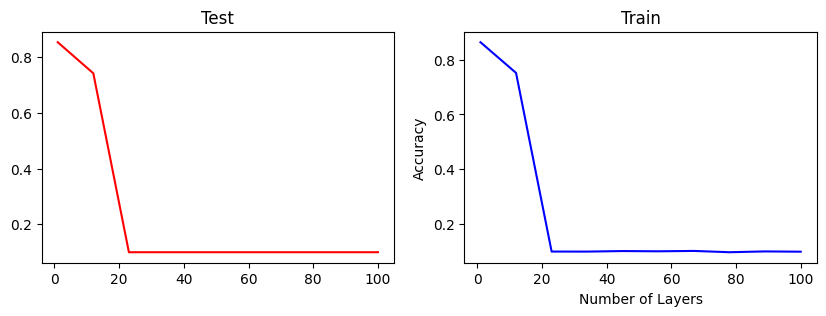

In [9]:
figure, axis = plt.subplots(1, 2, figsize=(10, 3))
axis[0].plot(layers,test_metrics,'r')
axis[0].set_title("Test")
axis[1].plot(layers,train_metrics,'b')
axis[1].set_title("Train")
plt.xlabel('Number of Layers')
plt.ylabel('Accuracy')

In [10]:
l_rate_log = np.linspace(-5,0,6)
train_metrics = []
test_metrics = []

for i in l_rate_log:
  his, res = model_evaluation(layers=5, l_rate=10**i)
  test_metrics.append(res[1])
  train_metrics.append(his['accuracy'][-1])
  print(f'{len(test_metrics)}/{len(l_rate_log)},', end=' ')


1/6, 2/6, 3/6, 4/6, 5/6, 6/6, 

Text(0, 0.5, 'Accuracy')

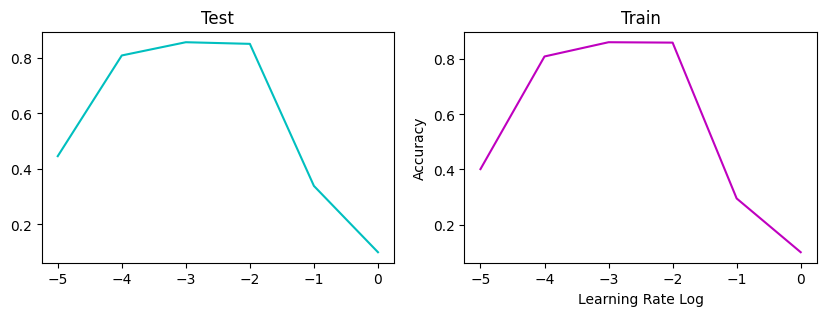

In [11]:
figure, axis = plt.subplots(1, 2, figsize=(10, 3))
axis[0].plot(l_rate_log,test_metrics,'c')
axis[0].set_title("Test")
axis[1].plot(l_rate_log,train_metrics,'m')
axis[1].set_title("Train")
plt.xlabel('Learning Rate Log')
plt.ylabel('Accuracy')

In [12]:
l_rate = [0.001, 0.005, 0.0075, 0.01, 0.0125]
train_metrics = []
test_metrics = []

for i in l_rate:
  his, res = model_evaluation(layers=5, l_rate=i)
  test_metrics.append(res[1])
  train_metrics.append(his['accuracy'][-1])
  print(f'{len(test_metrics)}/{len(l_rate)},', end=' ')

1/5, 2/5, 3/5, 4/5, 5/5, 

Text(0, 0.5, 'Accuracy')

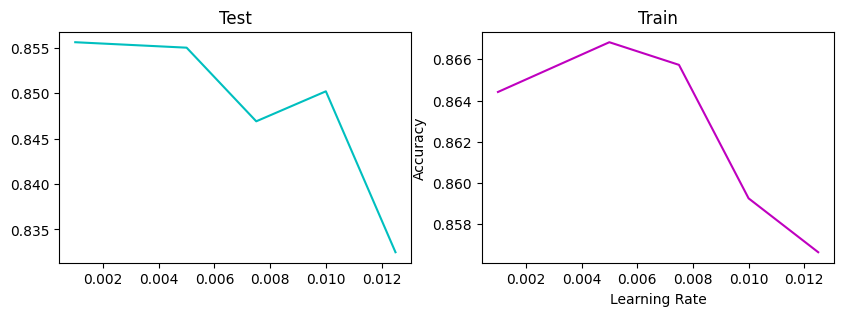

In [13]:
figure, axis = plt.subplots(1, 2, figsize=(10, 3))
axis[0].plot(l_rate,test_metrics,'c')
axis[0].set_title("Test")
axis[1].plot(l_rate,train_metrics,'m')
axis[1].set_title("Train")
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')

In [15]:
epochs = [1,3,5,7,10,15,20]
train_metrics = []
test_metrics = []

for i in epochs:
  his, res = model_evaluation(layers=5, l_rate=0.005, epochs=i)
  test_metrics.append(res[1])
  train_metrics.append(his['accuracy'][-1])
  print(f'{len(test_metrics)}/{len(epochs)},', end=' ')

1/7, 2/7, 3/7, 4/7, 5/7, 6/7, 7/7, 

Text(0, 0.5, 'Accuracy')

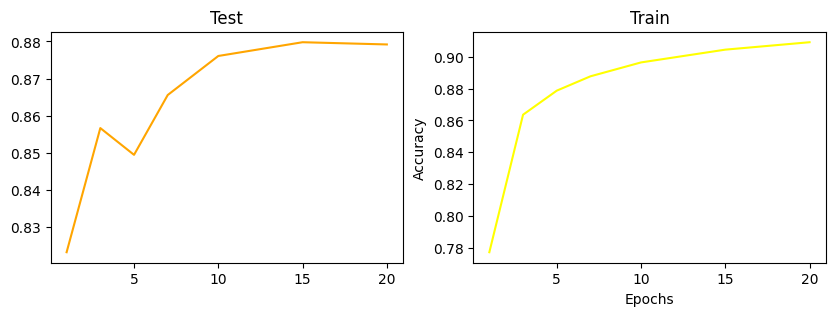

In [16]:
figure, axis = plt.subplots(1, 2, figsize=(10, 3))
axis[0].plot(epochs,test_metrics,'orange')
axis[0].set_title("Test")
axis[1].plot(epochs,train_metrics,'yellow')
axis[1].set_title("Train")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

In [17]:
batch = [100, 250, 500,750, 1000]
train_metrics = []
test_metrics = []

for i in batch:
  his, res = model_evaluation(layers=5, l_rate=0.005, epochs=15, batch_size=i)
  test_metrics.append(res[1])
  train_metrics.append(his['accuracy'][-1])
  print(f'{len(test_metrics)}/{len(batch)},', end=' ')

1/5, 2/5, 3/5, 4/5, 5/5, 

Text(0, 0.5, 'Accuracy')

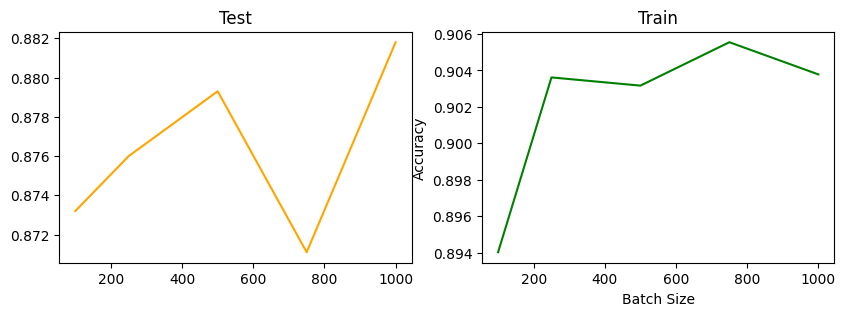

In [18]:
figure, axis = plt.subplots(1, 2, figsize=(10, 3))
axis[0].plot(batch,test_metrics,'orange')
axis[0].set_title("Test")
axis[1].plot(batch,train_metrics,'green')
axis[1].set_title("Train")
plt.xlabel('Batch Size')
plt.ylabel('Accuracy')

In [19]:
neurons = [32, 64, 128, 256, 512]
train_metrics = []
test_metrics = []

for i in neurons:
  his, res = model_evaluation(layers=5, l_rate=0.005, epochs=15, batch_size=1000,
                              neurons=i )
  test_metrics.append(res[1])
  train_metrics.append(his['accuracy'][-1])
  print(f'{len(test_metrics)}/{len(neurons)},', end=' ')

1/5, 2/5, 3/5, 4/5, 5/5, 

Text(0, 0.5, 'Accuracy')

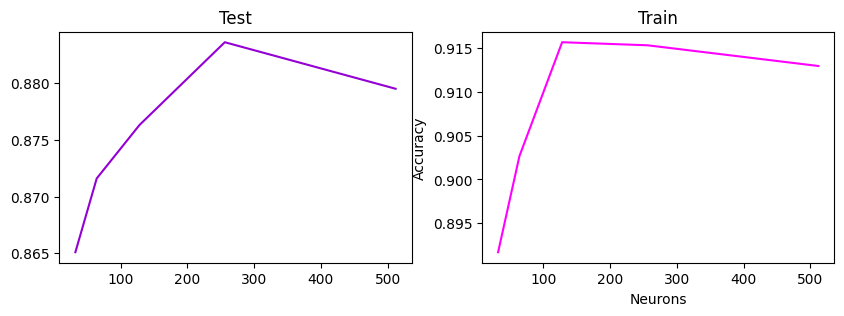

In [20]:
figure, axis = plt.subplots(1, 2, figsize=(10, 3))
axis[0].plot(neurons,test_metrics,'darkviolet')
axis[0].set_title("Test")
axis[1].plot(neurons,train_metrics,'fuchsia')
axis[1].set_title("Train")
plt.xlabel('Neurons')
plt.ylabel('Accuracy')

In [21]:
optimizers = [SGD, Adam, RMSprop, Adagrad]
train_metrics = []
test_metrics = []

for i in optimizers:
  his, res = model_evaluation(layers=5, l_rate=0.005, epochs=15, batch_size=1000,
                              neurons=256, optimizer=i )
  test_metrics.append(res[1])
  train_metrics.append(his['accuracy'][-1])
  print(f'{len(test_metrics)}/{len(optimizers)},', end=' ')

1/4, 2/4, 3/4, 4/4, 

Text(0, 0.5, 'Accuracy')

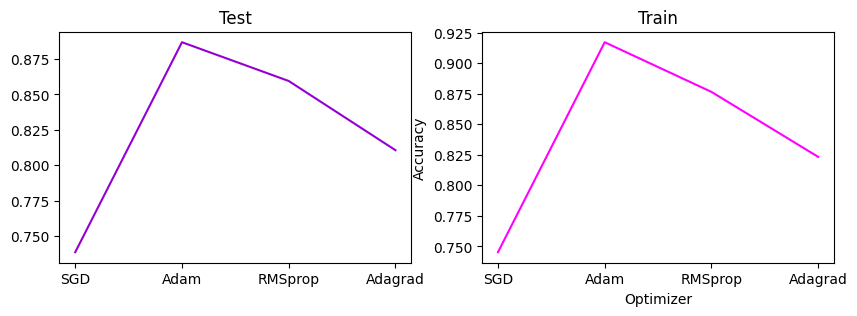

In [22]:
figure, axis = plt.subplots(1, 2, figsize=(10, 3))
opt = [str(i)[:-2].split('.')[-1] for i in optimizers]
axis[0].plot(opt,test_metrics,'darkviolet')
axis[0].set_title("Test")
axis[1].plot(opt,train_metrics,'fuchsia')
axis[1].set_title("Train")
plt.xlabel('Optimizer')
plt.ylabel('Accuracy')

In [29]:
losses = ['categorical_crossentropy','mean_squared_error',
          'categorical_hinge', 'kl_divergence']
train_metrics = []
test_metrics = []

for i in losses:
  his, res = model_evaluation(layers=5, l_rate=0.005, epochs=15, batch_size=500,
                              neurons=256, optimizer=Adam, loss=i )
  test_metrics.append(res[1])
  train_metrics.append(his['accuracy'][-1])
  print(f'{len(test_metrics)}/{len(losses)},', end=' ')

1/4, 2/4, 3/4, 4/4, 

Text(0, 0.5, 'Accuracy')

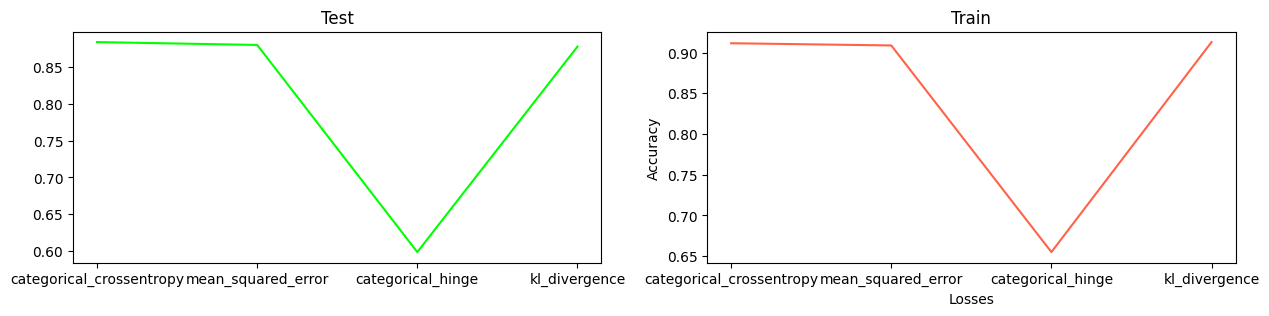

In [30]:
figure, axis = plt.subplots(1, 2, figsize=(15, 3))

axis[0].plot(losses,test_metrics,'lime')
axis[0].set_title("Test")
axis[1].plot(losses,train_metrics,'tomato')
axis[1].set_title("Train")
plt.xlabel('Losses')
plt.ylabel('Accuracy')